In [179]:
import pandas as pd
from plotnine import ggplot, aes, geom_histogram
import plotnine as p9
import numpy as np


In [146]:
Athlete = pd.read_csv("olympic_athletes.csv")
Hote = pd.read_csv("olympic_hosts.csv")
Medaille = pd.read_csv("olympic_medals.csv")
Resultat =  pd.read_csv("olympic_results.csv")

In [147]:
Athlete.head()

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.0,NaN,NaN
1,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2,PyeongChang 2018,1995.0,NaN,NaN
2,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,1,Beijing 2022,1993.0,NaN,NaN
3,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,1,Beijing 2022,1995.0,NaN,NaN
4,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,1,Beijing 2022,1989.0,NaN,NaN


In [148]:
Hote = Hote[Hote.game_season == "Summer"]
Hote

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
5,london-2012,2012-08-12T19:00:00Z,2012-07-27T07:00:00Z,Great Britain,London 2012,Summer,2012
7,beijing-2008,2008-08-24T12:00:00Z,2008-08-08T00:00:00Z,China,Beijing 2008,Summer,2008
9,athens-2004,2004-08-29T18:00:00Z,2004-08-13T06:00:00Z,Greece,Athens 2004,Summer,2004
11,sydney-2000,2000-10-01T09:00:00Z,2000-09-15T01:00:00Z,Australia,Sydney 2000,Summer,2000
13,atlanta-1996,1996-08-05T21:00:00Z,1996-07-19T12:00:00Z,United States,Atlanta 1996,Summer,1996
15,barcelona-1992,1992-08-09T18:00:00Z,1992-07-25T06:00:00Z,Spain,Barcelona 1992,Summer,1992
17,seoul-1988,1988-10-02T10:00:00Z,1988-09-16T22:00:00Z,Republic of Korea,Seoul 1988,Summer,1988
19,los-angeles-1984,1984-08-12T19:00:00Z,1984-07-28T15:00:00Z,United States,Los Angeles 1984,Summer,1984


In [149]:
Medaille = Medaille[(Medaille['country_code']=='DDDE')|(Medaille["country_3_letter_code"] == "GER") | (Medaille["country_3_letter_code"] == "FRG")]
Medaille

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
35,Freestyle Skiing,beijing-2022,Women's Ski Cross,Women,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/daniela-maier,Daniela MAIER,Germany,DE,GER
116,Ski Jumping,beijing-2022,Men's Team,Men,BRONZE,GameTeam,Germany,NaN,NaN,Germany,DE,GER
119,Ski Jumping,beijing-2022,Men's LH Individual,Men,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/geiger,Karl GEIGER,Germany,DE,GER
123,Ski Jumping,beijing-2022,Women's NH Individual,Women,SILVER,Athlete,NaN,https://olympics.com/en/athletes/katharina-alt...,Katharina ALTHAUS,Germany,DE,GER
151,Luge,beijing-2022,Team Relay,Mixed,GOLD,GameTeam,Germany,NaN,NaN,Germany,DE,GER
...,...,...,...,...,...,...,...,...,...,...,...,...
21630,Gymnastics Artistic,athens-1896,team parallel bars men,Men,GOLD,GameTeam,Germany team,NaN,NaN,Germany,DE,GER
21634,Gymnastics Artistic,athens-1896,team horizontal bar men,Men,GOLD,GameTeam,Germany team,NaN,NaN,Germany,DE,GER
21636,Gymnastics Artistic,athens-1896,pommel horse men,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/hermann-weing...,Hermann WEINGÄRTNER,Germany,DE,GER
21651,Cycling Road,athens-1896,individual road race men,Men,SILVER,Athlete,NaN,NaN,Anton Gödrich,Germany,DE,GER


In [150]:

Resultat = Resultat[(Resultat["country_3_letter_code"] == "GER") | (Resultat["country_3_letter_code"] == "FRG")| (Resultat["country_code"] == "DDDE")]
Resultat

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
119,Freestyle Skiing,Men's Ski Cross,beijing-2022,Athlete,NaN,NaN,False,32,Germany,DE,GER,https://olympics.com/en/athletes/niklas-bachsl...,Niklas BACHSLEITNER,NaN,NaN
143,Freestyle Skiing,Men's Ski Cross,beijing-2022,Athlete,NaN,NaN,False,21,Germany,DE,GER,https://olympics.com/en/athletes/florian-wilms...,Florian WILMSMANN,NaN,NaN
144,Freestyle Skiing,Men's Ski Cross,beijing-2022,Athlete,NaN,NaN,False,23,Germany,DE,GER,https://olympics.com/en/athletes/tobias-mueller-1,Tobias MUELLER,NaN,NaN
145,Freestyle Skiing,Men's Ski Cross,beijing-2022,Athlete,NaN,NaN,False,14,Germany,DE,GER,https://olympics.com/en/athletes/daniel-bohnacker,Daniel BOHNACKER,NaN,NaN
170,Freestyle Skiing,Women's Freeski Big Air,beijing-2022,Athlete,NaN,NaN,False,18,Germany,DE,GER,https://olympics.com/en/athletes/alia-delia-ei...,Alia Delia EICHINGER,64.75,POINTS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162639,Alpine Skiing,slalom men,lake-placid-1980,Athlete,NaN,NaN,NaN,25,Federal Republic of Germany,DE,FRG,https://olympics.com/en/athletes/josef-ferstl,Josef FERSTL,119300,TIME
162693,Alpine Skiing,slalom men,lake-placid-1980,Athlete,NaN,NaN,NaN,DSQ,Federal Republic of Germany,DE,FRG,https://olympics.com/en/athletes/albert-burger,Albert BURGER,NaN,IRM
162698,Equestrian Jumping,Jumping Individual mixed,montreal-1976,Athlete,GOLD,NaN,NaN,1,Federal Republic of Germany,DE,FRG,https://olympics.com/en/athletes/alwin-schocke...,Alwin SCHOCKEMÖHLE,0.00,POINTS
162708,Equestrian Jumping,Jumping Individual mixed,montreal-1976,Athlete,NaN,NaN,True,10,Federal Republic of Germany,DE,FRG,https://olympics.com/en/athletes/hans-gunter-w...,Hans Günter WINKLER,16.00,POINTS


In [151]:
#Merge
REHO = pd.merge(Resultat,Hote, left_on='slug_game', right_on='game_slug', how = 'inner')
REHO.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,...,athlete_full_name,value_unit,value_type,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,Shooting,50m Rifle 3 Positions women,tokyo-2020,Athlete,NaN,NaN,False,6,Germany,DE,...,Jolyn BEER,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
1,Shooting,25m Rapid Fire Pistol Men,tokyo-2020,Athlete,NaN,NaN,False,5,Germany,DE,...,Christian REITZ,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,Shooting,25m Rapid Fire Pistol Men,tokyo-2020,Athlete,NaN,NaN,False,13,Germany,DE,...,Oliver GEIS,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
3,Shooting,10m Air Rifle women,tokyo-2020,Athlete,NaN,NaN,False,17,Germany,DE,...,Jolyn BEER,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
4,Shooting,Trap Men,tokyo-2020,Athlete,NaN,NaN,False,15,Germany,DE,...,Andreas LOEW,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020


In [152]:
data_medals = REHO[~REHO.medal_type.isnull()]
data_medals

total_medals = []
year = []

for i in range(0,len(Hote)*4+12,4):
    total_medals.append(len(data_medals[data_medals.game_year == (2020 - i)]))
    year.append(2020-i)

medal_country = pd.DataFrame((zip(total_medals, year)), columns = ['Total_medals', 'Year'])

print(medal_country.head())

   Total_medals  Year
0            37  2020
1            42  2016
2            44  2012
3            41  2008
4            49  2004


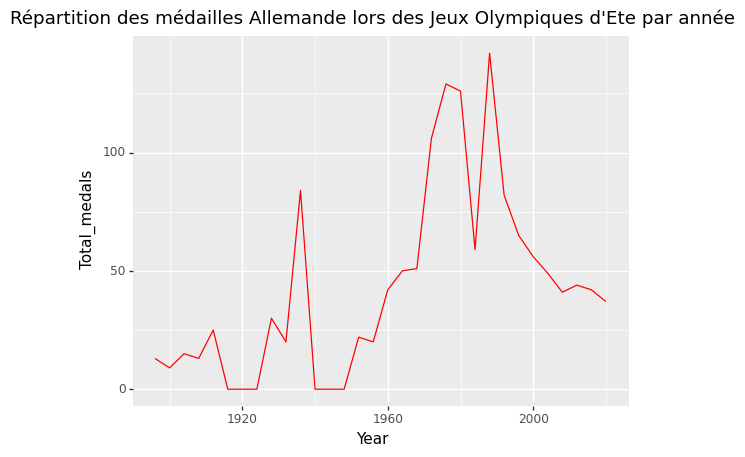

<ggplot: (155939885132)>

In [153]:
plot = p9.ggplot(data=medal_country,
           mapping=p9.aes(y="Total_medals", x="Year"))
plot + p9.geom_line(color='red') + p9.ggtitle("Répartition des médailles Allemande lors des Jeux Olympiques d'Ete par année")

# 2

In [154]:
#Athlete total
Athletes = REHO.groupby(by=["game_year"]).size().reset_index(name='athletes_total')
Athletes

,game_year,athletes_total
0,1896,88
1,1900,60
2,1904,61
3,1908,78
4,1912,126
5,1928,122
6,1932,70
7,1936,231
8,1952,220
9,1956,133


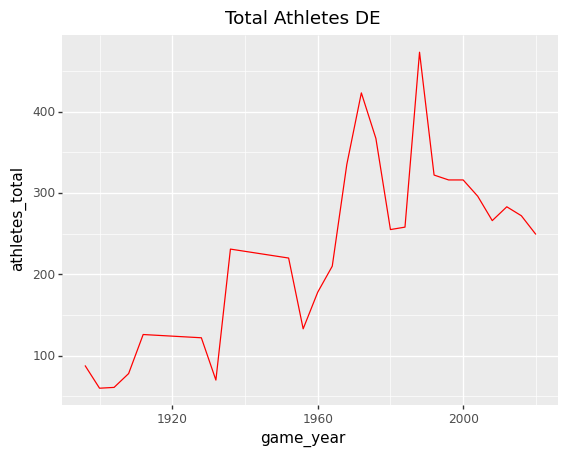

<ggplot: (155939944427)>

In [155]:
plotA = p9.ggplot(data=Athletes,
           mapping=p9.aes(y="athletes_total", x="game_year"))
plotA + p9.geom_line(color='red') + p9.ggtitle("Total Athletes DE")

In [156]:
Homme = Medaille[Medaille["event_gender"] == "Men"]
Homme

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
116,Ski Jumping,beijing-2022,Men's Team,Men,BRONZE,GameTeam,Germany,NaN,NaN,Germany,DE,GER
119,Ski Jumping,beijing-2022,Men's LH Individual,Men,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/geiger,Karl GEIGER,Germany,DE,GER
161,Luge,beijing-2022,Men's Singles,Men,GOLD,Athlete,NaN,https://olympics.com/en/athletes/johannes-ludwig,Johannes LUDWIG,Germany,DE,GER
241,Skeleton,beijing-2022,Men,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/axel-jungk,Axel JUNGK,Germany,DE,GER
243,Skeleton,beijing-2022,Men,Men,GOLD,Athlete,NaN,https://olympics.com/en/athletes/christopher-g...,Christopher GROTHEER,Germany,DE,GER
...,...,...,...,...,...,...,...,...,...,...,...,...
21630,Gymnastics Artistic,athens-1896,team parallel bars men,Men,GOLD,GameTeam,Germany team,NaN,NaN,Germany,DE,GER
21634,Gymnastics Artistic,athens-1896,team horizontal bar men,Men,GOLD,GameTeam,Germany team,NaN,NaN,Germany,DE,GER
21636,Gymnastics Artistic,athens-1896,pommel horse men,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/hermann-weing...,Hermann WEINGÄRTNER,Germany,DE,GER
21651,Cycling Road,athens-1896,individual road race men,Men,SILVER,Athlete,NaN,NaN,Anton Gödrich,Germany,DE,GER


In [157]:
dates = []
for value in Homme["slug_game"].values:
    dates.append(int(value.split("-")[-1]))
    
Homme.insert(12, "date", np.array(dates))

In [158]:
Homme

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,date
116,Ski Jumping,beijing-2022,Men's Team,Men,BRONZE,GameTeam,Germany,NaN,NaN,Germany,DE,GER,2022
119,Ski Jumping,beijing-2022,Men's LH Individual,Men,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/geiger,Karl GEIGER,Germany,DE,GER,2022
161,Luge,beijing-2022,Men's Singles,Men,GOLD,Athlete,NaN,https://olympics.com/en/athletes/johannes-ludwig,Johannes LUDWIG,Germany,DE,GER,2022
241,Skeleton,beijing-2022,Men,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/axel-jungk,Axel JUNGK,Germany,DE,GER,2022
243,Skeleton,beijing-2022,Men,Men,GOLD,Athlete,NaN,https://olympics.com/en/athletes/christopher-g...,Christopher GROTHEER,Germany,DE,GER,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21630,Gymnastics Artistic,athens-1896,team parallel bars men,Men,GOLD,GameTeam,Germany team,NaN,NaN,Germany,DE,GER,1896
21634,Gymnastics Artistic,athens-1896,team horizontal bar men,Men,GOLD,GameTeam,Germany team,NaN,NaN,Germany,DE,GER,1896
21636,Gymnastics Artistic,athens-1896,pommel horse men,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/hermann-weing...,Hermann WEINGÄRTNER,Germany,DE,GER,1896
21651,Cycling Road,athens-1896,individual road race men,Men,SILVER,Athlete,NaN,NaN,Anton Gödrich,Germany,DE,GER,1896


In [159]:
HommeY = Homme.groupby(by="date").event_gender.size().reset_index(name='athletes homme')
HommeY

,date,athletes homme
0,1896,13
1,1900,7
2,1904,15
3,1908,12
4,1912,22
5,1928,28
6,1932,21
7,1936,76
8,1952,21
9,1956,16


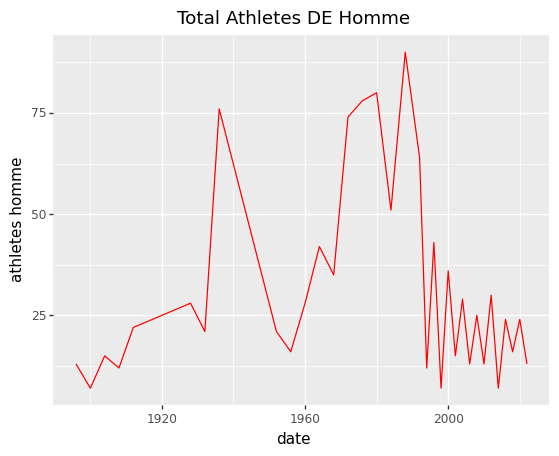

<ggplot: (155939006109)>

In [160]:
plotH = p9.ggplot(data=HommeY,
           mapping=p9.aes(x="date", y="athletes homme"))
plotH + p9.geom_line(color='red') + p9.ggtitle("Total Athletes DE Homme")

In [161]:
Femme = Medaille[Medaille["event_gender"] == "Women"]
Femme

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
35,Freestyle Skiing,beijing-2022,Women's Ski Cross,Women,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/daniela-maier,Daniela MAIER,Germany,DE,GER
123,Ski Jumping,beijing-2022,Women's NH Individual,Women,SILVER,Athlete,NaN,https://olympics.com/en/athletes/katharina-alt...,Katharina ALTHAUS,Germany,DE,GER
163,Luge,beijing-2022,Women's Singles,Women,SILVER,Athlete,NaN,https://olympics.com/en/athletes/anna-berreiter,Anna BERREITER,Germany,DE,GER
165,Luge,beijing-2022,Women's Singles,Women,GOLD,Athlete,NaN,https://olympics.com/en/athletes/natalie-geise...,Natalie GEISENBERGER,Germany,DE,GER
192,Biathlon,beijing-2022,Women's 4x6km Relay,Women,BRONZE,GameTeam,Germany,NaN,NaN,Germany,DE,GER
...,...,...,...,...,...,...,...,...,...,...,...,...
19210,Fencing,amsterdam-1928,foil individual women,Women,GOLD,Athlete,NaN,https://olympics.com/en/athletes/helene-mayer,Helene MAYER,Germany,DE,GER
19212,Fencing,amsterdam-1928,foil individual women,Women,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/olga-oelkers-...,Olga OELKERS-CARAGIOFF,Germany,DE,GER
20345,Tennis,stockholm-1912,Singles women,Women,SILVER,Athlete,NaN,https://olympics.com/en/athletes/dora-koring,Dora KÖRING,Germany,DE,GER
20620,Swimming,stockholm-1912,4x100m freestyle relay women,Women,SILVER,GameTeam,Germany team,NaN,NaN,Germany,DE,GER


In [162]:
dates = []
for value in Femme["slug_game"].values:
    dates.append(int(value.split("-")[-1]))
    
Femme.insert(12, "date", np.array(dates))

In [163]:
FemmeY = Femme.groupby(by="date").event_gender.size().reset_index(name='athletes femme')
FemmeY

,date,athletes femme
0,1908,1
1,1912,2
2,1928,6
3,1932,2
4,1936,15
5,1952,7
6,1956,8
7,1960,20
8,1964,12
9,1968,17


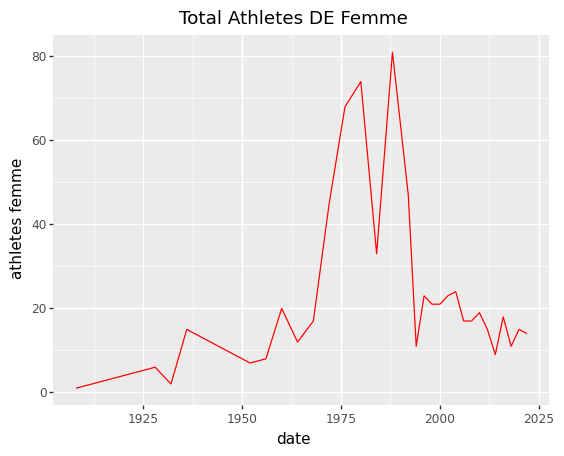

<ggplot: (155939342382)>

In [164]:
plotF = p9.ggplot(data=FemmeY,
           mapping=p9.aes(x="date", y="athletes femme"))
plotF + p9.geom_line(color='red') + p9.ggtitle("Total Athletes DE Femme")

In [165]:
Mixed = Medaille[Medaille["event_gender"] == "Mixed"]
Mixed

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
151,Luge,beijing-2022,Team Relay,Mixed,GOLD,GameTeam,Germany,NaN,NaN,Germany,DE,GER
221,Alpine Skiing,beijing-2022,Mixed Team Parallel,Mixed,SILVER,GameTeam,Germany,NaN,NaN,Germany,DE,GER
961,Judo,tokyo-2020,Mixed Team,Mixed,BRONZE,GameTeam,Germany,NaN,NaN,Germany,DE,GER
1386,Sailing,tokyo-2020,Nacra 17 Mixed,Mixed,BRONZE,GameTeam,Germany,https://olympics.com/en/athletes/paul-kohlhoff,Paul KOHLHOFF,Germany,DE,GER
1387,Sailing,tokyo-2020,Nacra 17 Mixed,Mixed,BRONZE,GameTeam,Germany,https://olympics.com/en/athletes/alica-stuhlemmer,Alica STUHLEMMER,Germany,DE,GER
1714,Figure skating,pyeongchang-2018,Pair Skating,Mixed,GOLD,GameTeam,Germany team #1,https://olympics.com/en/athletes/aliona-savchenko,Aljona SAVCHENKO,Germany,DE,GER
1715,Figure skating,pyeongchang-2018,Pair Skating,Mixed,GOLD,GameTeam,Germany team #1,https://olympics.com/en/athletes/massot,Bruno MASSOT,Germany,DE,GER
1798,Luge,pyeongchang-2018,Team Relay,Mixed,GOLD,GameTeam,Germany team,NaN,NaN,Germany,DE,GER
3144,Figure skating,sochi-2014,Pairs mixed,Mixed,BRONZE,GameTeam,Germany team #1,https://olympics.com/en/athletes/aliona-savchenko,Aljona SAVCHENKO,Germany,DE,GER
3145,Figure skating,sochi-2014,Pairs mixed,Mixed,BRONZE,GameTeam,Germany team #1,https://olympics.com/en/athletes/robin-szolkowy,Robin SZOLKOWY,Germany,DE,GER


In [166]:
dates = []
for value in Mixed["slug_game"].values:
    dates.append(int(value.split("-")[-1]))
    
Mixed.insert(12, "date", np.array(dates))

In [167]:
MixedY = Mixed.groupby(by="date").event_gender.size().reset_index(name='athletes equ')
MixedY

,date,athletes equ
0,1908,2
1,1912,2
2,1936,2
3,1952,2
4,1960,2
5,1964,2
6,1968,2
7,1972,2
8,1976,4
9,1980,2


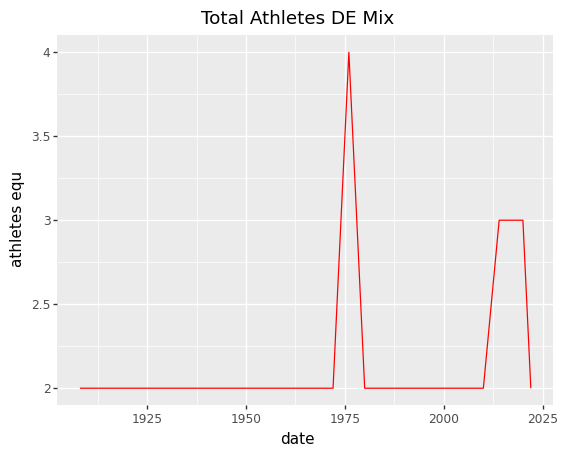

<ggplot: (155938702466)>

In [168]:
plotM = p9.ggplot(data=MixedY,
           mapping=p9.aes(x="date", y="athletes equ"))
plotM + p9.geom_line(color='red') + p9.ggtitle("Total Athletes DE Mix")

In [169]:
A = pd.merge(HommeY,FemmeY, how= 'outer')
A

,date,athletes homme,athletes femme
0,1896,13,NaN
1,1900,7,NaN
2,1904,15,NaN
3,1908,12,1.0
4,1912,22,2.0
5,1928,28,6.0
6,1932,21,2.0
7,1936,76,15.0
8,1952,21,7.0
9,1956,16,8.0


In [170]:
All = pd.merge(A,MixedY, how = 'outer')
All

,date,athletes homme,athletes femme,athletes equ
0,1896,13,NaN,NaN
1,1900,7,NaN,NaN
2,1904,15,NaN,NaN
3,1908,12,1.0,2.0
4,1912,22,2.0,2.0
5,1928,28,6.0,NaN
6,1932,21,2.0,NaN
7,1936,76,15.0,2.0
8,1952,21,7.0,2.0
9,1956,16,8.0,NaN


In [184]:
plotM = p9.ggplot(data=All,
           mapping=p9.aes(x="date", y="athletes femme",)).aes(y='athletes homme')
plotM + p9.geom_line(color='red') + p9.ggtitle("Total Athletes")

AttributeError: 'ggplot' object has no attribute 'aes'

In [200]:
plotA = p9.ggplot(data = All, p9.aes(x='date'))
+ p9.geom_line(p9.aes(y = 'athletes homme'), color = "darkred") 
+ p9.geom_line(p9.aes(y = 'athletes femme'), color='red') 

SyntaxError: positional argument follows keyword argument (1130933495.py, line 1)